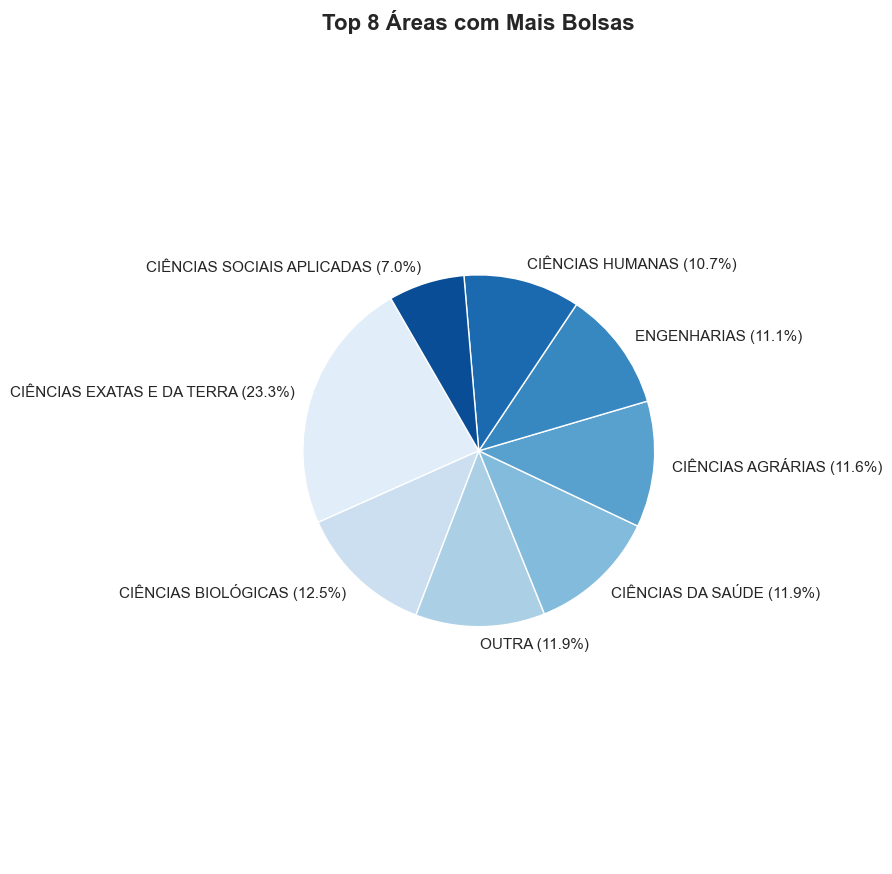

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo mais limpo e técnico
sns.set(style="whitegrid")

# Carregar os dados
inep = pd.read_csv("C:/Users/cynth/OneDrive/Área de Trabalho/Desafio_Eng._Dados_FADESP/data/processed/inep_tratado.csv")

# Limpar valores monetários
inep['VALOR_PAGO'] = (
    inep['VALOR_PAGO']
    .astype(str)
    .str.replace("R\$", "", regex=True)
    .str.replace(".", "", regex=False)
    .str.replace(",", ".", regex=False)
)
inep['VALOR_PAGO'] = pd.to_numeric(inep['VALOR_PAGO'], errors='coerce')
inep = inep.dropna(subset=['VALOR_PAGO'])

# Padronizar área de conhecimento
inep["AREA_CONHECIMENTO"] = inep["AREA_CONHECIMENTO"].str.upper()

# Agrupar por área
bolsas_por_area = inep.groupby("AREA_CONHECIMENTO").size().reset_index(name="QTD_BOLSAS")
valor_por_area = inep.groupby("AREA_CONHECIMENTO")["VALOR_PAGO"].sum().reset_index(name="VALOR_TOTAL")
df_area = pd.merge(bolsas_por_area, valor_por_area, on="AREA_CONHECIMENTO")

# Top 8 áreas com mais bolsas
top8_area_qtd = df_area.sort_values(by="QTD_BOLSAS", ascending=False).head(8)

# Cores personalizadas em tons frios
colors = sns.color_palette("Blues", len(top8_area_qtd))

# Gráfico de pizza
plt.figure(figsize=(9, 9))
plt.pie(
    top8_area_qtd["QTD_BOLSAS"],
    labels=[f"{area} ({valor:.1f}%)" for area, valor in zip(top8_area_qtd["AREA_CONHECIMENTO"], 100 * top8_area_qtd["QTD_BOLSAS"] / top8_area_qtd["QTD_BOLSAS"].sum())],
    autopct=None,
    startangle=120,
    colors=colors,
    wedgeprops={"edgecolor": "white"}
)
plt.title("Top 8 Áreas com Mais Bolsas", fontsize=16, weight="bold")
plt.axis("equal")
plt.tight_layout()
plt.show()
